In [1]:
import json
import pickle
from gensim.models import LdaModel
from gensim.corpora import Dictionary

from scipy.sparse import coo_matrix, csr_matrix, lil_matrix, csc_matrix, diags, vstack
from scipy.stats import chi2_contingency, spearmanr, norm

from matplotlib import pyplot as plt
from IPython.display import HTML, display
import pandas as pd
import numpy as np
import random
from datetime import date
from matplotlib.dates import DateFormatter
import matplotlib.patches as mpatches

In [2]:
politics_dictionary = Dictionary.load("stored_variables/politics_dictionary_lda")

In [3]:
sanders_tf_by_month = []
trump_tf_by_month = []

In [4]:
for i in range(24):
    with open("stored_variables/politics_sanders_tf" + str(i) + ".pickle", 'rb') as f:
        sanders_tf_by_month.append(pickle.load(f))
        
    with open("stored_variables/politics_trump_tf" + str(i) + ".pickle", 'rb') as f:
        trump_tf_by_month.append(pickle.load(f))


In [5]:
# adapted from https://github.com/jmhessel/FightingWords/blob/master/fighting_words.py
def fightin_words(mat1, mat2, prior = 1):
    vocab_size = mat1.shape[0]
    priors = np.array([prior for i in range(vocab_size)])
    
    z_scores = np.empty(vocab_size)
    a0 = np.sum(priors)
    n1 = 1.*np.sum(mat1)
    n2 = 1.*np.sum(mat2)

    for i in range(vocab_size):
        #compute delta
        term1 = np.log((mat1[i] + priors[i])/(n1 + a0 - mat1[i] - priors[i]))
        term2 = np.log((mat2[i] + priors[i])/(n2 + a0 - mat2[i] - priors[i]))        
        delta = term1 - term2
        #compute variance on delta
        var = 1./(mat1[i] + priors[i]) + 1./(mat2[i] + priors[i])
        #store final score
        z_scores[i] = delta/np.sqrt(var)
    sorted_indices = np.argsort(z_scores)
    return_list = []
    for i in sorted_indices:
        return_list.append((politics_dictionary.id2token[i], i, z_scores[i]))
        
    return return_list

In [6]:
def fightin_words_unsorted(mat1, mat2, prior = 1):
    vocab_size = mat1.shape[0]
    priors = np.array([prior for i in range(vocab_size)])
    
    z_scores = np.empty(vocab_size)
    a0 = np.sum(priors)
    n1 = 1.*np.sum(mat1)
    n2 = 1.*np.sum(mat2)

    for i in range(vocab_size):
        #compute delta
        term1 = np.log((mat1[i] + priors[i])/(n1 + a0 - mat1[i] - priors[i]))
        term2 = np.log((mat2[i] + priors[i])/(n2 + a0 - mat2[i] - priors[i]))        
        delta = term1 - term2
        #compute variance on delta
        var = 1./(mat1[i] + priors[i]) + 1./(mat2[i] + priors[i])
        #store final score
        z_scores[i] = delta/np.sqrt(var)
#     sorted_indices = np.argsort(z_scores)
    return_list = []
    for i in range(len(z_scores)):
        return_list.append(z_scores[i])
        
    return return_list

In [7]:
fightin_words_lists = []

In [8]:
for i in range(24):
    tmp_sanders = sanders_tf_by_month[i].sum(axis=0).A1
    tmp_trump = trump_tf_by_month[i].sum(axis=0).A1
    
    tmp_fightin = fightin_words(tmp_trump, tmp_sanders)
    fightin_words_lists.append(fightin_words_unsorted(tmp_trump, tmp_sanders))
    print(tmp_fightin[:20])
    print(tmp_fightin[-20:])
    print()

[('we', 259, -9.721696271595938), ('minimum', 521, -8.406691655037989), ('not', 103, -7.955911722862852), ('wage', 523, -7.90869334289792), ('vote', 278, -6.4415829491339345), ('for', 51, -6.358938988798619), ('wages', 558, -5.694671458014704), ('warming', 3343, -5.627027758194764), ('speech', 3200, -5.6104436790090935), ('which', 163, -5.591038235976635), ('by', 95, -5.536100123655994), ('infrastructure', 542, -5.491603440547148), ('workers', 1260, -5.347365817965029), ('economic', 1956, -5.2450870853133695), ('be', 50, -5.212204021055818), ('at', 282, -5.101951869073723), ('decades', 3672, -5.029688876896073), ('has', 136, -5.015047535749559), ('policy', 375, -4.964213482837692), ('capitalism', 4123, -4.8917925053624876)]
[('accidents', 14962, 4.670501200410132), ('crimes', 170, 4.703136649234404), ('saudi', 4942, 4.864175358303949), ('violence', 1928, 4.873605090538561), ('didnt', 10072, 4.875196297668027), ('ammunition', 9816, 4.877355910918913), ('cartel', 11215, 4.877355910918913

[('bernie', 365, -17.05878214270746), ('sanders', 83, -15.039636028687267), ('he', 2, -11.103293051539064), ('but', 9, -9.030861582665375), ('campaign', 1097, -8.818875020171538), ('wage', 523, -8.764735110357202), ('think', 84, -8.604654195313378), ('re', 15, -8.298342480890717), ('t', 41, -8.243250922084943), ('we', 259, -7.978589501780639), ('more', 456, -7.495108876414478), ('workers', 1260, -7.4430593232716085), ('m', 285, -7.372311572328581), ('vote', 278, -7.343781962857924), ('though', 843, -7.248801646517513), ('hillary', 27, -6.922368914934588), ('candidate', 367, -6.891509030925786), ('banks', 582, -6.8384284622236695), ('ve', 61, -6.470680923912346), ('him', 56, -6.4643656119285735)]
[('criminals', 903, 7.536239921792435), ('uses', 5094, 7.580717752056508), ('illegals', 6212, 7.707721456459474), ('illegally', 5023, 8.046215000816437), ('dont', 1440, 8.30780404297631), ('immigration', 2013, 8.549699181673216), ('injury', 3009, 8.720880612129791), ('immigrants', 452, 8.859210

[('sanders', 83, -30.438691468697684), ('clinton', 158, -26.803329582050207), ('bernie', 365, -25.280459830250162), ('she', 241, -22.7151675169124), ('her', 229, -18.97601255215456), ('hillary', 27, -16.31655382082422), ('campaign', 1097, -15.350610909566432), ('democratic', 23, -13.600308932006612), ('payer', 4094, -12.818773066167452), ('banks', 582, -12.465559645067536), ('dnc', 24, -11.995437682939672), ('single', 693, -11.872337707715488), ('vote', 278, -11.243990041534545), ('primary', 601, -11.182956978987143), ('poll', 1214, -11.181669512194366), ('candidate', 367, -10.939811716949935), ('health', 635, -10.871698288611865), ('healthcare', 356, -10.773705846667871), ('party', 34, -10.415293856891008), ('iowa', 1835, -10.326305064798243)]
[('america', 835, 12.417980183397795), ('refugees', 1995, 12.454393263646978), ('border', 2062, 12.458215239120888), ('fox', 2181, 12.625312307205677), ('illegals', 6212, 12.830677912491288), ('rape', 3234, 12.918028993847257), ('islam', 3816, 1

[('sanders', 83, -36.829659199562904), ('bernie', 365, -34.12955105674096), ('vote', 278, -30.57138033647948), ('party', 34, -29.93463498327837), ('voting', 1223, -26.26500899968979), ('clinton', 158, -24.68228757063355), ('progressive', 719, -24.375772962024282), ('she', 241, -23.891313957767775), ('stein', 5798, -22.559208058971905), ('democratic', 23, -21.189786258109972), ('election', 397, -20.634531687021198), ('her', 229, -20.286583248060506), ('exit', 1206, -19.315840059872478), ('but', 9, -18.6507730473413), ('jill', 3111, -18.201520605867795), ('candidate', 367, -17.971983058404636), ('platform', 2860, -17.437627543154125), ('primary', 601, -17.341833905843224), ('green', 890, -15.954194013880773), ('fraud', 1101, -15.58105837551542)]
[('liberals', 2776, 16.54157262674375), ('countries', 2576, 16.608598189482116), ('you', 6, 16.77405279832898), ('blm', 4722, 16.913525258395854), ('muslim', 1789, 17.231085205388233), ('muslims', 426, 17.65848165112898), ('cruz', 368, 17.8899180

In [107]:
def vocab_loss(count_r, count_d):
    sum_r = sum(count_r)
    sum_d = sum(count_d)
    q_r = count_r / sum_r
    q_d = count_d / sum_d
    rho_denom = q_r + q_d
    rho_denom[rho_denom == 0] = 1
    rho = q_r / rho_denom
    r_denom = 1 - q_r
    d_denom = 1 - q_d
    
    vals = np.zeros(count_r.shape[0])
    
    for j in range(count_r.shape[0]):
        if count_r[j] <= 1 or count_d[j] <= 1:
            vals[j] = 0
        else:
            curr_val = np.sum(((q_r / r_denom[j]) * rho) + ((q_d / d_denom[j]) * rho)) - \
(((q_r[j] / r_denom[j]) * rho[j]) + ((q_d[j] / d_denom[j]) * rho[j]))
            
            vals[j] = 0.5 - (0.5 * curr_val)
            
    return vals

In [108]:
polarization_by_month = []

In [109]:
for i in range(24):
    print(i)
    tmp_sanders = sanders_tf_by_month[i].sum(axis=0).A1
    tmp_trump = trump_tf_by_month[i].sum(axis=0).A1
    
    tmp_vals = vocab_loss(tmp_trump, tmp_sanders)
    polarization_by_month.append(tmp_vals)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [234]:
[politics_dictionary.id2token[i] for i in np.argsort(polarization_by_month[0])[-20:]]

['insurance',
 'there',
 'world',
 'obama',
 'than',
 'just',
 'are',
 'all',
 'police',
 'he',
 'when',
 'if',
 'out',
 'don',
 'gun',
 'people',
 'your',
 'like',
 't',
 'you']

In [112]:
[politics_dictionary.id2token[i] for i in np.argsort(polarization_by_month[0])[:20]]

['we',
 'not',
 'wage',
 'minimum',
 'for',
 'by',
 'which',
 'vote',
 'at',
 'has',
 'one',
 're',
 'be',
 'm',
 'us',
 'wages',
 'republicans',
 'speech',
 'economic',
 'workers']

In [113]:
[polarization_by_month[0][i] for i in np.argsort(polarization_by_month[0])[-20:]]

[5.968520723992343e-05,
 6.047958307164869e-05,
 6.420225855030548e-05,
 6.587147626768708e-05,
 6.608783920353245e-05,
 6.633744887851734e-05,
 7.238398048742267e-05,
 7.496555781383307e-05,
 7.518479831036817e-05,
 7.956211122245316e-05,
 8.444536416712944e-05,
 8.703192959591544e-05,
 9.225165189397089e-05,
 0.00010648930111162302,
 0.00010881534272955129,
 0.00013089009777256244,
 0.00014652593794084456,
 0.00015409271853100703,
 0.0002076375963739885,
 0.0003863303058158074]

In [124]:
[polarization_by_month[0][i] for i in np.argsort(polarization_by_month[0])[:20]]

[-0.0003113731145714116,
 -0.00023011992373322965,
 -0.00013038129680653654,
 -0.0001262638398052962,
 -0.00011697241566266392,
 -0.00011253994585969096,
 -0.00010788385807791734,
 -0.00010573486623133288,
 -9.536348052119337e-05,
 -9.27851124171708e-05,
 -8.086712767352289e-05,
 -7.521758075690332e-05,
 -7.492873721715032e-05,
 -6.773092811418469e-05,
 -6.732965678168945e-05,
 -6.508343685007745e-05,
 -6.332107448236979e-05,
 -6.261219939951435e-05,
 -6.209035871374002e-05,
 -6.16681946105091e-05]

In [128]:
[(sanders_tf_by_month[0].sum(axis=0).A1[i] / sanders_tf_by_month[0].sum() * 100000, 
  trump_tf_by_month[0].sum(axis=0).A1[i] / trump_tf_by_month[0].sum() * 100000) 
 for i in np.argsort(polarization_by_month[0])[:20]]

[(695.2522756682675, 565.8359617180838),
 (1106.9018221382833, 1011.6461133747558),
 (117.19121041250072, 62.720254129835446),
 (89.31203825121108, 36.54921283824943),
 (1305.8801615018237, 1257.5636565456932),
 (422.7518716669895, 375.8702999291577),
 (274.2274323652517, 229.22222372630503),
 (131.2541556620008, 87.08639602200172),
 (474.6860817550555, 434.9807552601537),
 (368.9672740460944, 330.29659009380964),
 (337.3873268191468, 303.6743239523687),
 (330.9726500386731, 299.61330030367435),
 (936.666169118019, 905.6082736588469),
 (268.306192260199, 240.05162012282338),
 (205.88645281943548, 177.7825908428429),
 (54.27803429631612, 27.073490991295873),
 (116.69777373707966, 90.24496997098625),
 (51.44077341264505, 25.268591591876145),
 (62.04966193419776, 36.0979879883945),
 (57.36201351769772, 31.585739489845185)]

In [129]:
[(sanders_tf_by_month[0].sum(axis=0).A1[i] / sanders_tf_by_month[0].sum() * 100000, 
  trump_tf_by_month[0].sum(axis=0).A1[i] / trump_tf_by_month[0].sum() * 100000) 
 for i in np.argsort(polarization_by_month[0])[-20:]]

[(68.46433871467147, 93.40354391997076),
 (444.0930078789501, 469.2738438491284),
 (87.33829154952686, 114.1598870132976),
 (125.45627472580341, 152.9652241008217),
 (312.222056372673, 339.7723119407632),
 (473.69920840421344, 501.31080818882856),
 (1084.5738125754804, 1114.52537914168),
 (463.33703822037126, 494.5424354410046),
 (52.05756925692138, 83.47659722316227),
 (411.77290563887095, 444.9077019569622),
 (301.8598861888308, 337.06496284163364),
 (693.0318106288728, 729.1793573655689),
 (295.4452094083571, 333.9063888926491),
 (425.83585088837106, 470.1762935488383),
 (42.065476579645, 87.53762087185666),
 (672.5541885988988, 726.9232331162942),
 (464.6939890777792, 525.6769500809949),
 (424.9723367063842, 489.12773724274547),
 (1297.7384563573764, 1383.455389655219),
 (1867.9045348064062, 2026.450800698496)]

In [127]:
for i in range(24):
    print([politics_dictionary.id2token[j] for j in np.argsort(polarization_by_month[i])[-20:]])
    print([politics_dictionary.id2token[j] for j in np.argsort(polarization_by_month[i])[:20]])
    print()

['insurance', 'there', 'world', 'obama', 'than', 'just', 'are', 'all', 'police', 'he', 'when', 'if', 'out', 'don', 'gun', 'people', 'your', 'like', 't', 'you']
['we', 'not', 'wage', 'minimum', 'for', 'by', 'which', 'vote', 'at', 'has', 'one', 're', 'be', 'm', 'us', 'wages', 'republicans', 'speech', 'economic', 'workers']

['_subreddit_politics', 'was', 'gun', 'has', 'racist', 'carry', 'just', 'like', 'obama', 'know', 'think', 'on', 'don', 'are', 'who', 'he', 't', 'people', 'this', 'you']
['be', 'not', 'for', 'but', 'would', 'which', 'will', 'we', 'more', 'than', 'd', 'though', 'as', 'party', 'could', 'or', 'services', 'companies', 'from', 'health']

['world', 'am', 'there', 'science', 'do', 'our', 'section', 'me', 'climate', 'about', 'war', 'what', 'like', 'article', 'he', 'was', 'obama', 'no', 'who', 'government']
['t', 'be', 'if', 'their', 're', 'they', 'but', 'you', 'would', 'vote', 'get', 'don', 'jobs', 'wage', 'just', 'way', 'first', 'republican', 'since', 'm']

['rights', 'after'

## Plot values

In [188]:
plt.get_cmap('bwr')(0.999)

(1.0, 0.0, 0.0, 1.0)

In [11]:
len('_subreddit_')

11

In [12]:
# adapted from https://gist.github.com/xandaschofield/3c4070b2f232b185ce6a09e47b4e7473
def make_plot(x_vals, y_vals, sig_val, ylab):
#     sizes = abs(z_scores) * 2
#     neg_color, pos_color, insig_color = ('orange', 'purple', 'grey')
    cmap = plt.get_cmap('bwr')
    colors = []
    annots = []
    for i, y in enumerate(y_vals):
        if y > sig_val:
            colors.append(cmap(0.999))
            if politics_dictionary.id2token[i][:11] == '_subreddit_':
                annots.append('/r/'+politics_dictionary.id2token[i][11:])
            else:
                annots.append(politics_dictionary.id2token[i])
        elif y < -sig_val:
            colors.append(cmap(0))
            if politics_dictionary.id2token[i][:11] == '_subreddit_':
                annots.append('/r/'+politics_dictionary.id2token[i][11:])
            else:
                annots.append(politics_dictionary.id2token[i])
        else:
            colors.append(cmap((y/(2*sig_val)) + 0.5))
            annots.append(None)

    fig, ax = plt.subplots(figsize=(10,8))
    plt.scatter(x_vals, y_vals, c=colors, linewidth=0, cmap = plt.get_cmap('bwr'))
    for i, annot in enumerate(annots):
        if annot is not None:
            ax.annotate(annot, (x_vals[i], y_vals[i]), color=colors[i])
    ax.set_xscale('log')
    plt.ylim((-1.05 * max(np.abs(y_vals)), 1.05 * max(np.abs(y_vals))))
    plt.xlim((10, 10 ** 6))
    plt.xlabel('Frequency of word, log scale')
    plt.ylabel(ylab)
    
    plt.show()

In [13]:
months = [date(2015, i, 1) for i in range(1,13)] + [date(2016, i, 1) for i in range(1,13)]

Jan - 2015


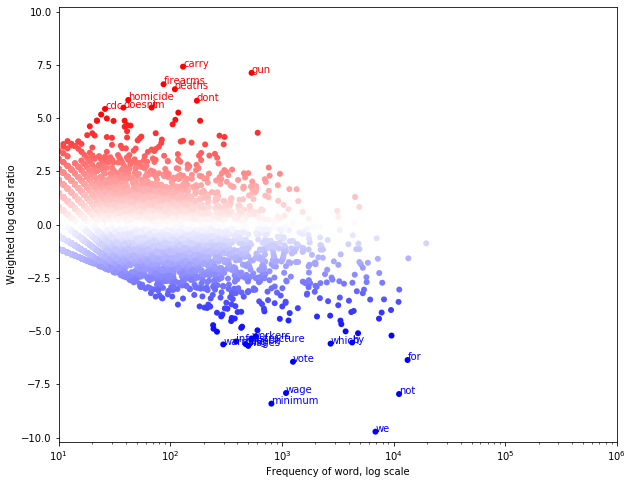

Feb - 2015


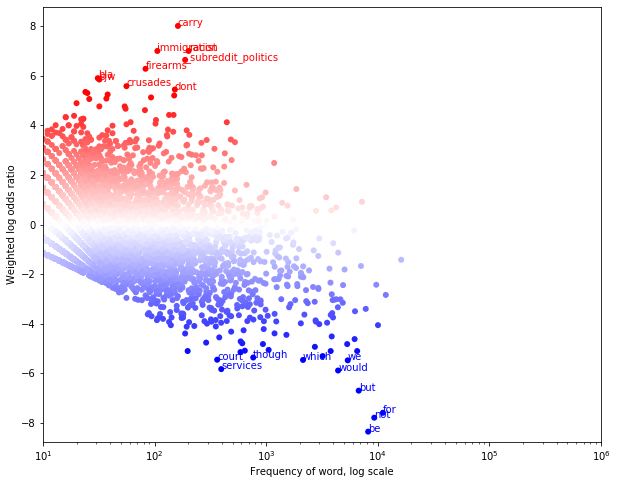

Mar - 2015


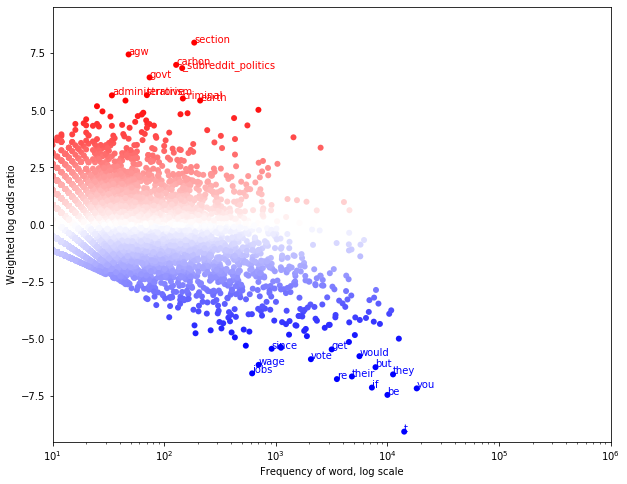

Apr - 2015


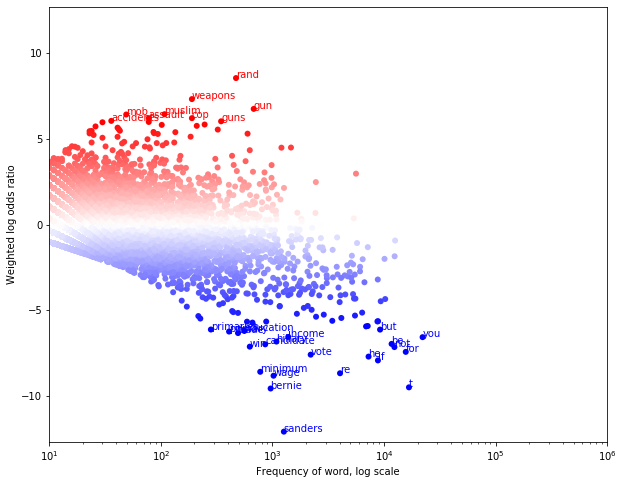

May - 2015


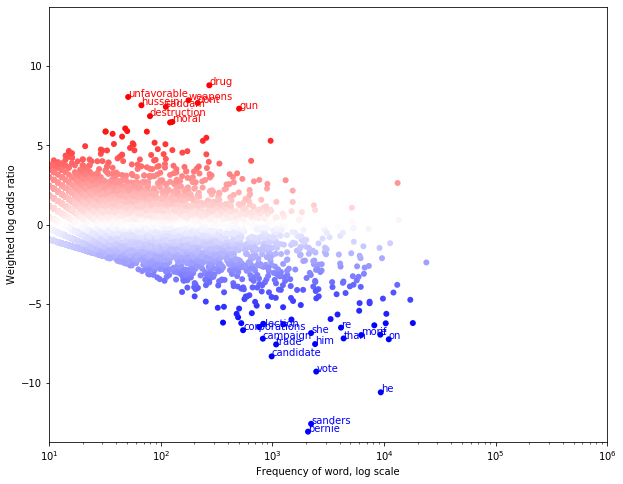

Jun - 2015


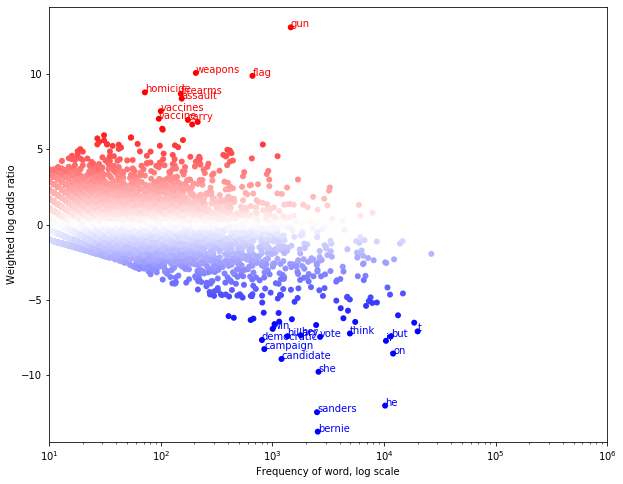

Jul - 2015


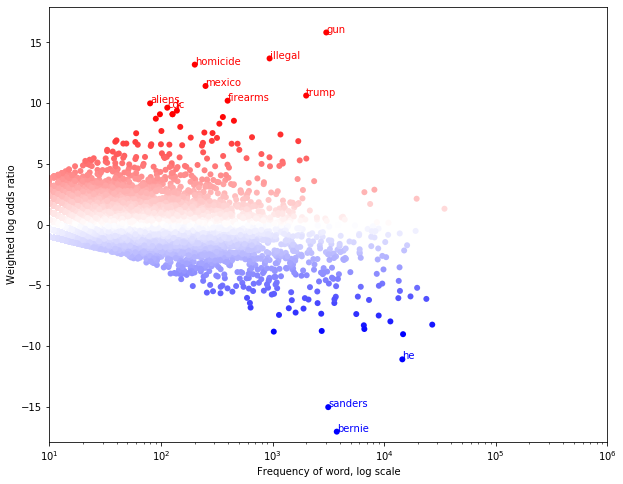

Aug - 2015


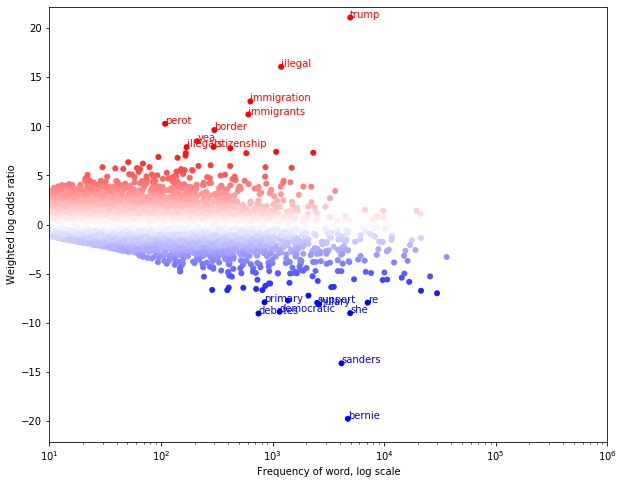

Sep - 2015


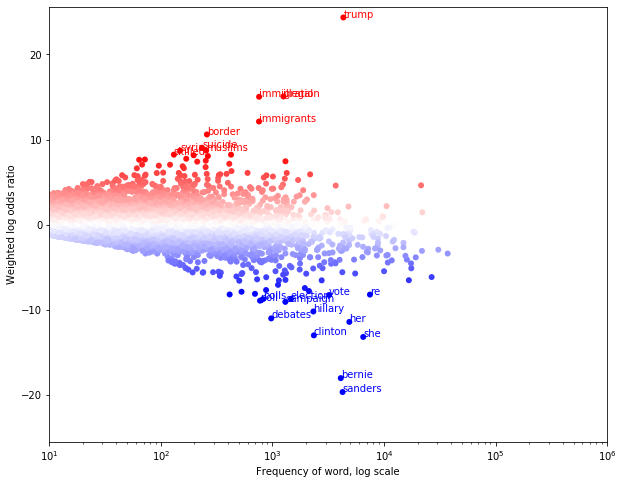

Oct - 2015


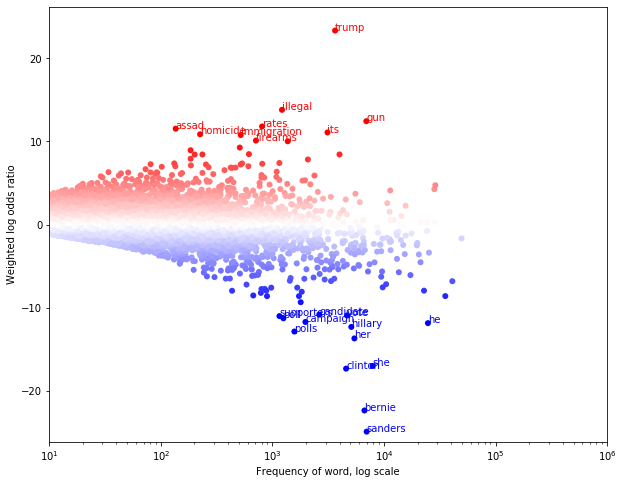

Nov - 2015


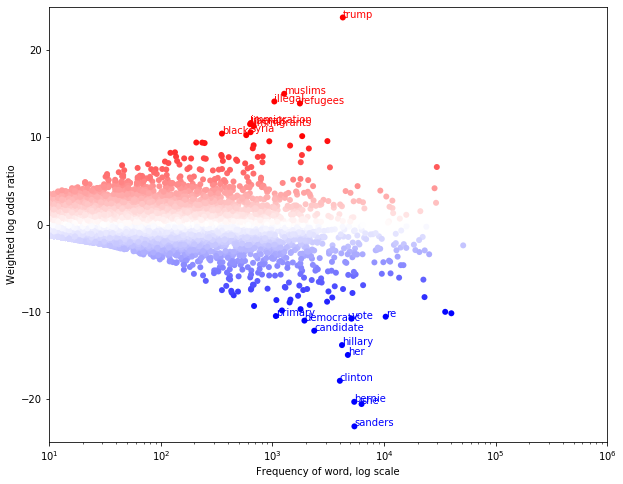

Dec - 2015


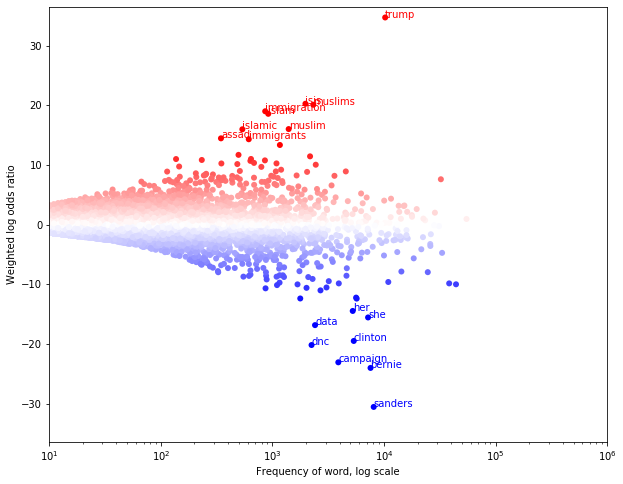

Jan - 2016


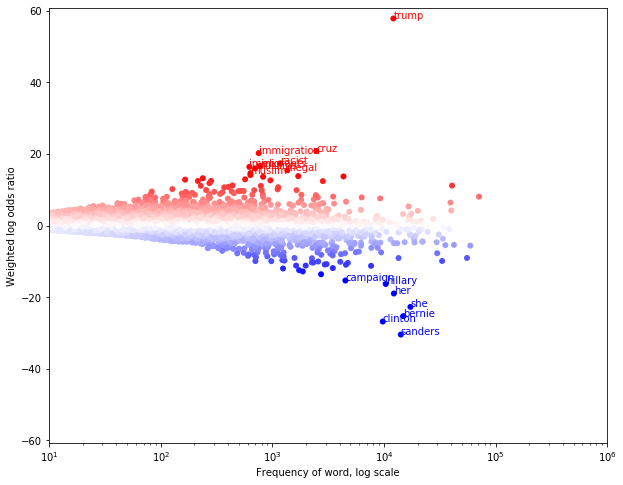

Feb - 2016


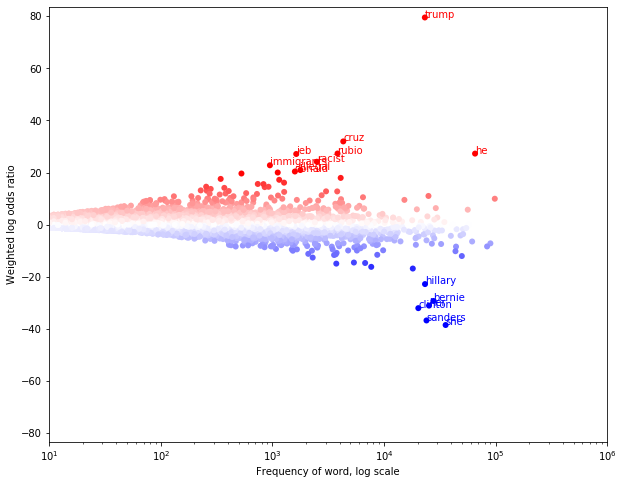

Mar - 2016


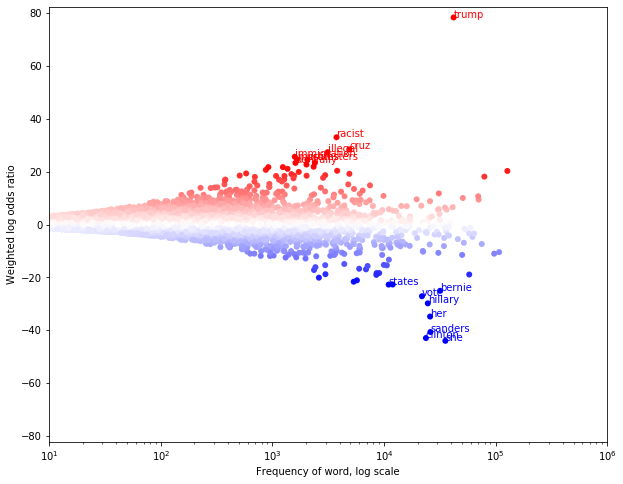

Apr - 2016


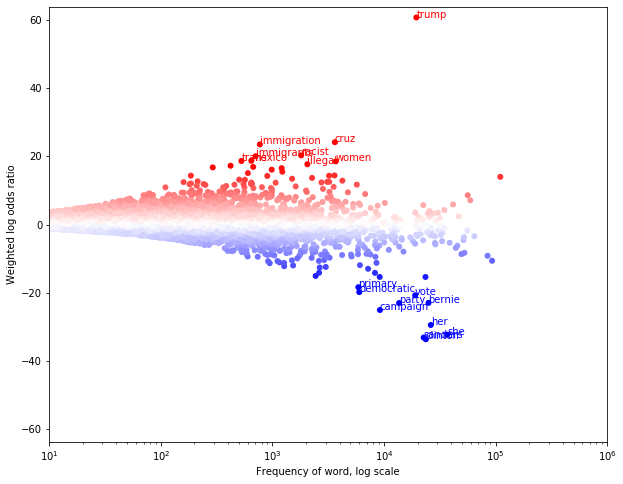

May - 2016


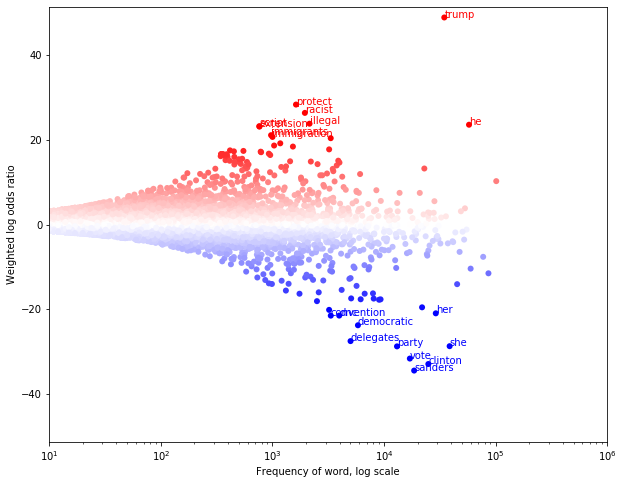

Jun - 2016


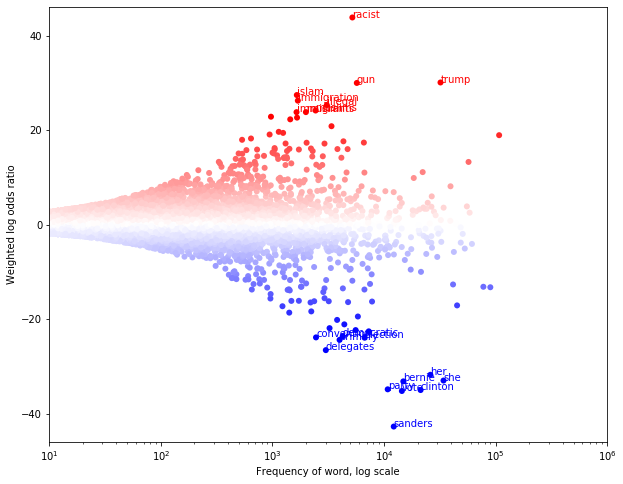

Jul - 2016


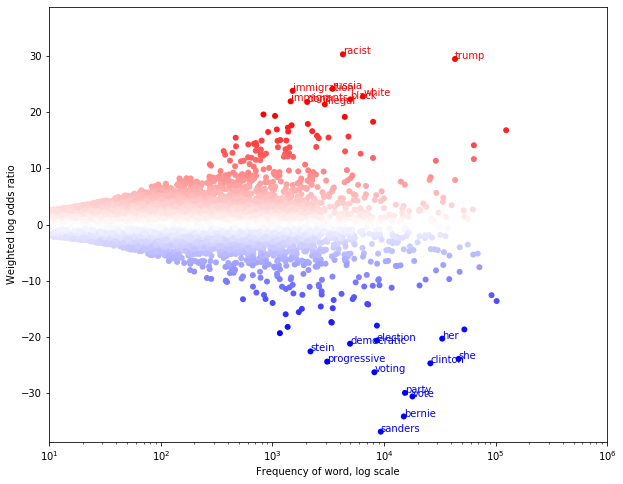

Aug - 2016


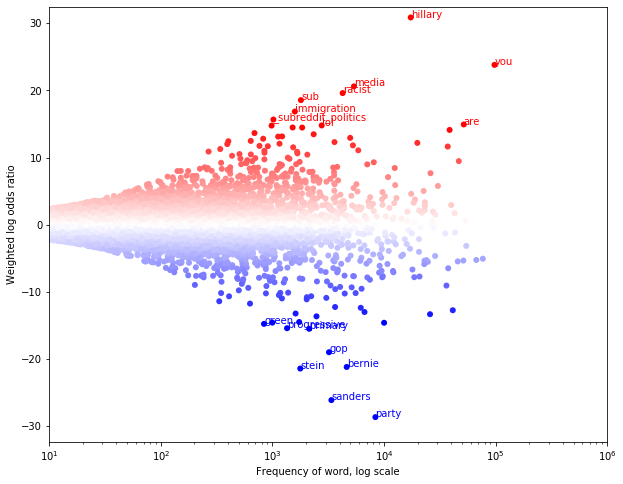

Sep - 2016


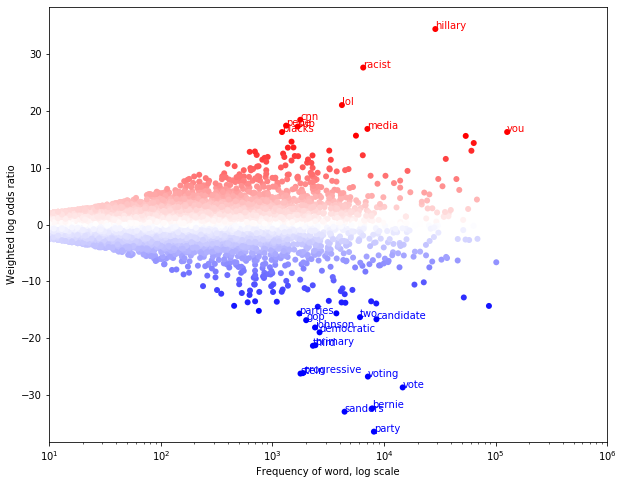

Oct - 2016


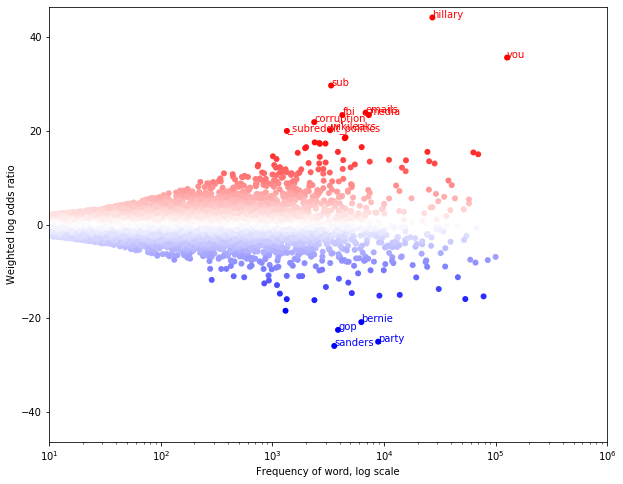

Nov - 2016


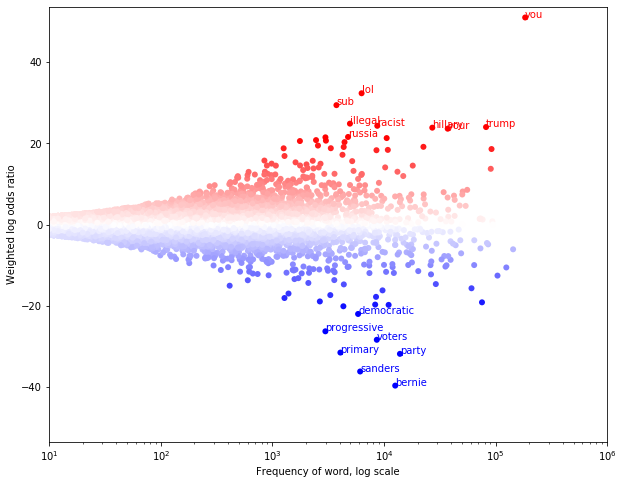

Dec - 2016


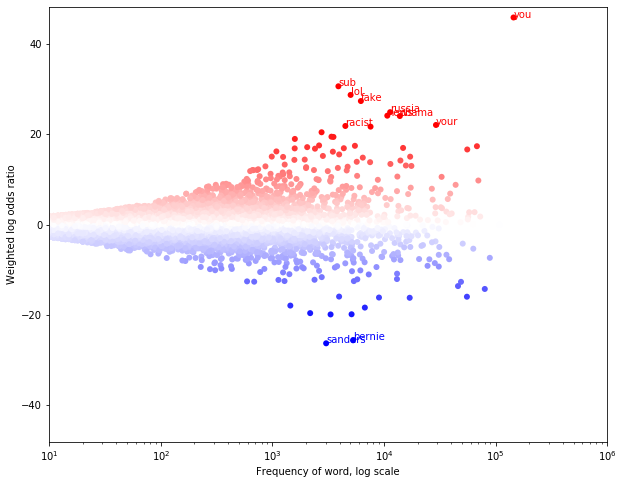

In [242]:
for i in range(24):
    print(months[i].strftime('%b - %Y'))
    tmp_sanders = sanders_tf_by_month[i].sum(axis=0).A1
    tmp_trump = trump_tf_by_month[i].sum(axis=0).A1
    
    make_plot(tmp_sanders + tmp_trump, fightin_words_lists[i], sorted(fightin_words_lists[i])[-10], 'Weighted log odds ratio')

Aug - 2016


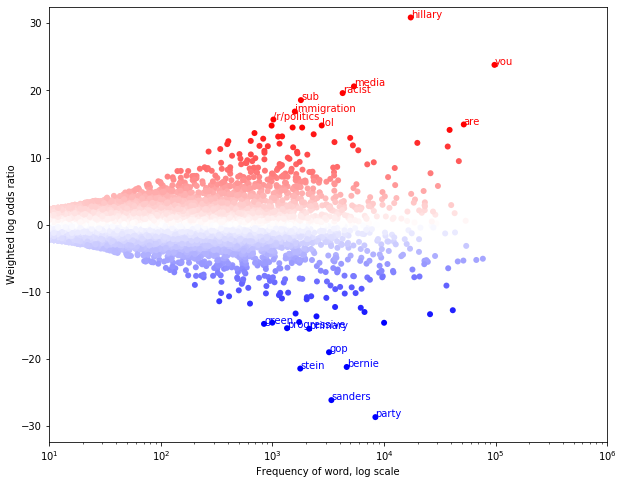

In [14]:
for i in range(19,20):
    print(months[i].strftime('%b - %Y'))
    tmp_sanders = sanders_tf_by_month[i].sum(axis=0).A1
    tmp_trump = trump_tf_by_month[i].sum(axis=0).A1
    
    make_plot(tmp_sanders + tmp_trump, fightin_words_lists[i], sorted(fightin_words_lists[i])[-10], 'Weighted log odds ratio')

Jan - 2015


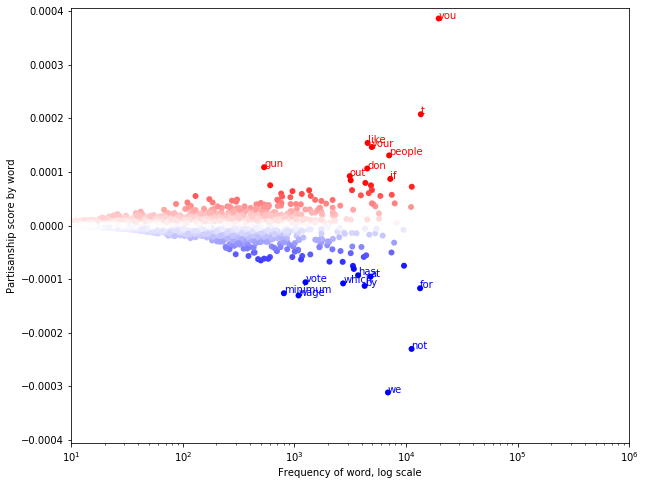

Feb - 2015


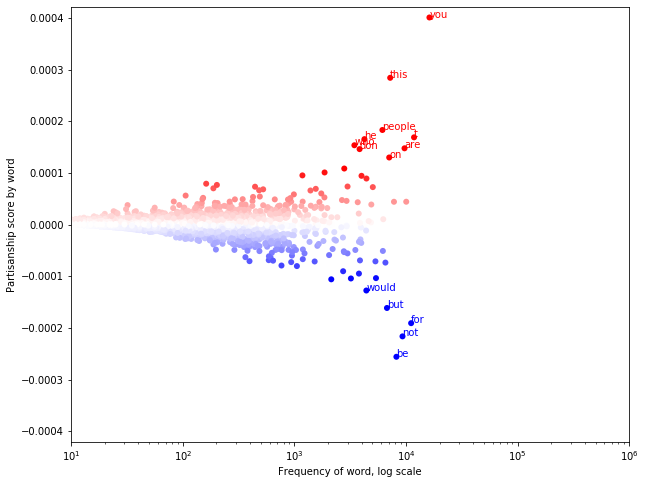

Mar - 2015


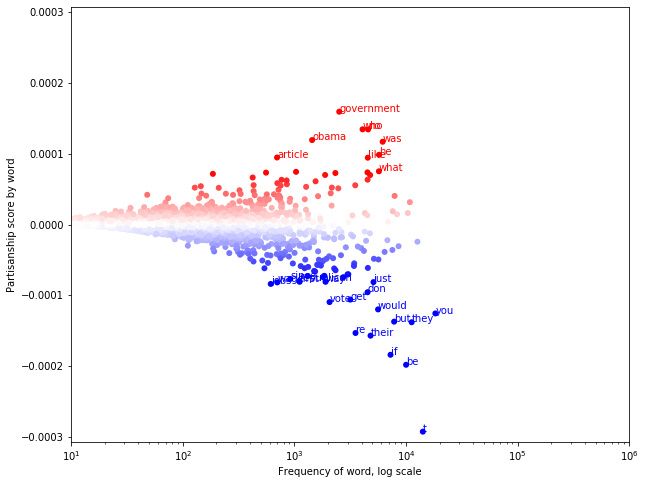

Apr - 2015


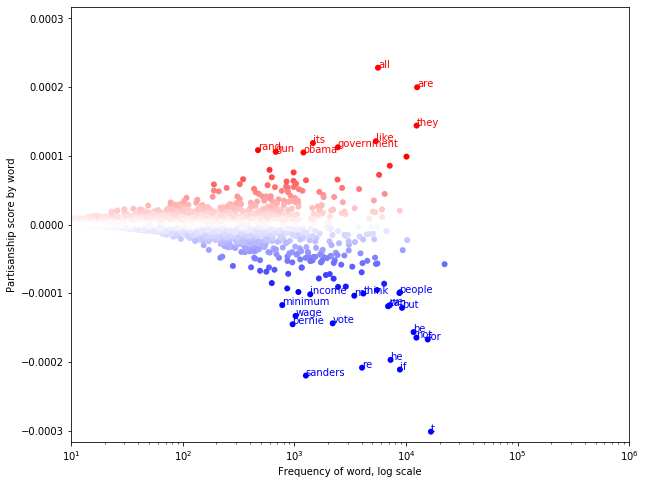

May - 2015


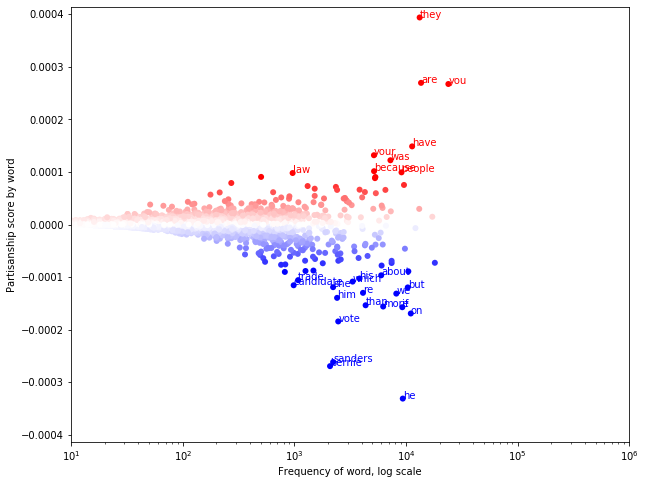

Jun - 2015


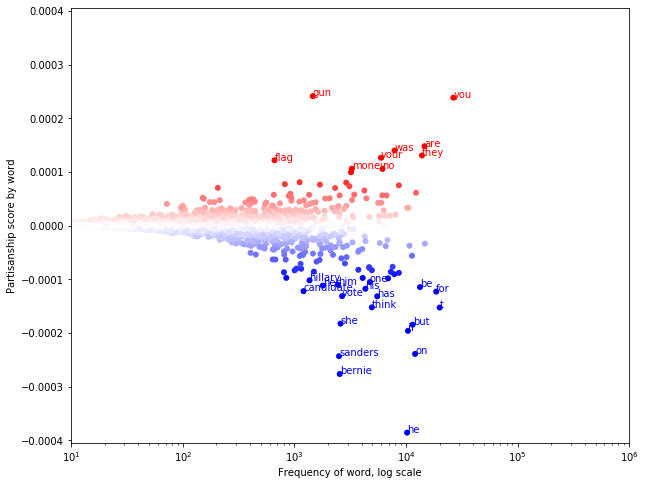

Jul - 2015


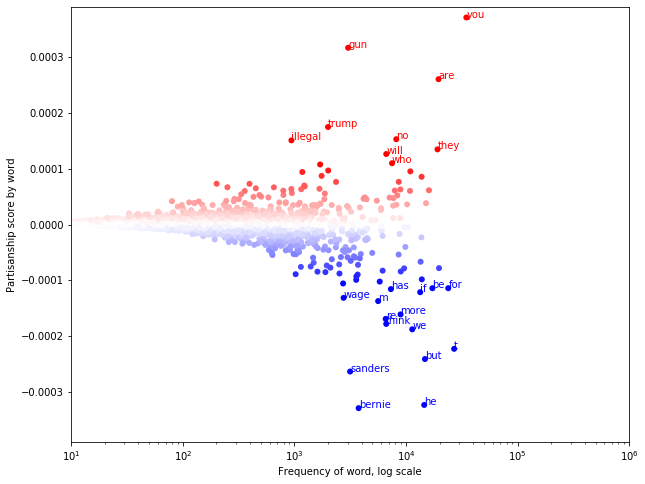

Aug - 2015


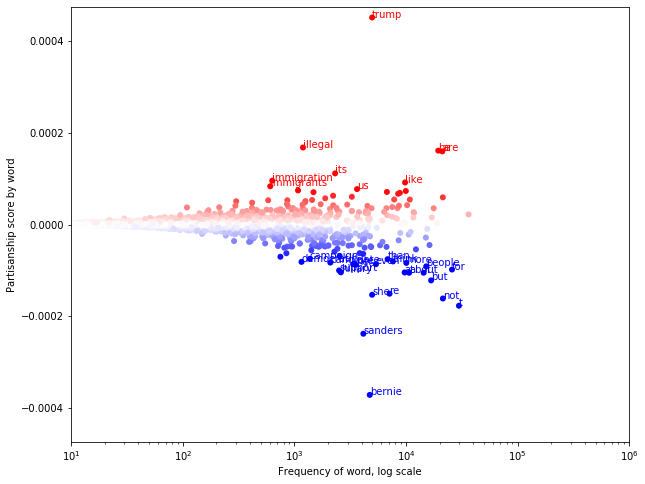

Sep - 2015


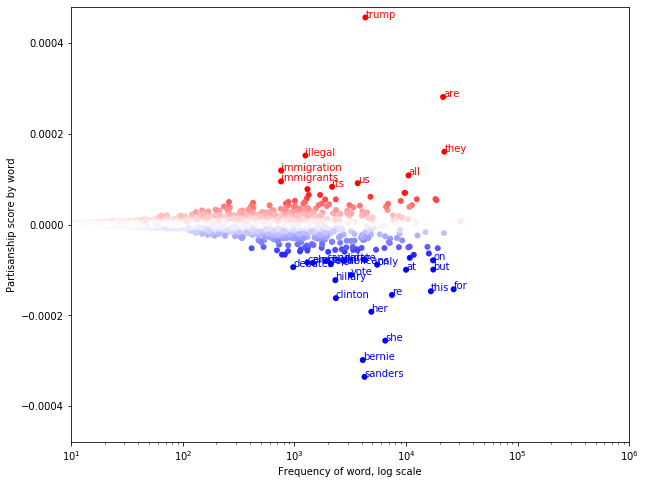

Oct - 2015


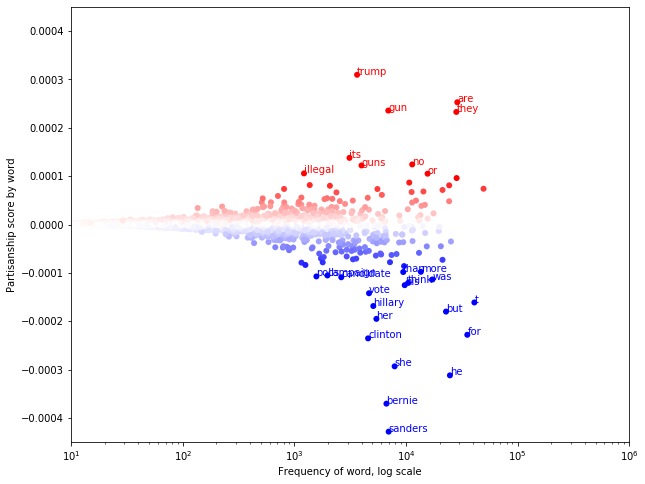

Nov - 2015


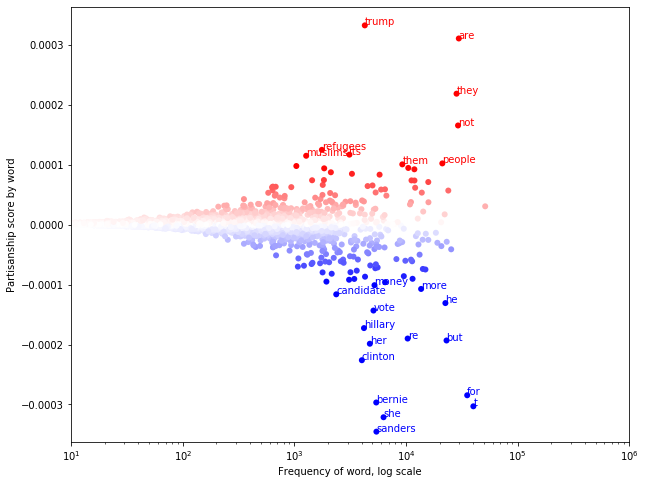

Dec - 2015


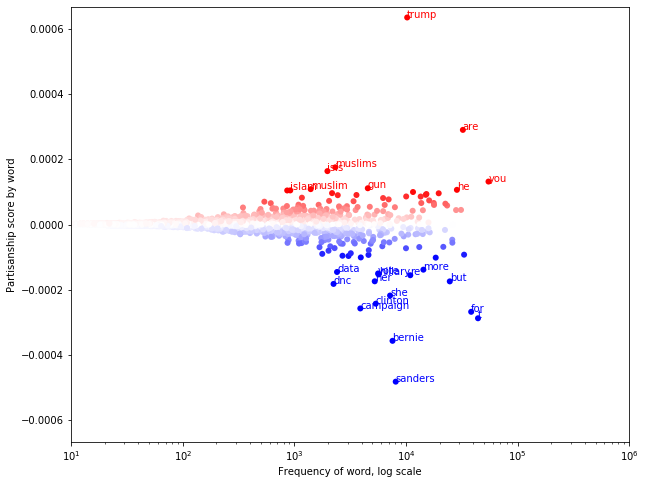

Jan - 2016


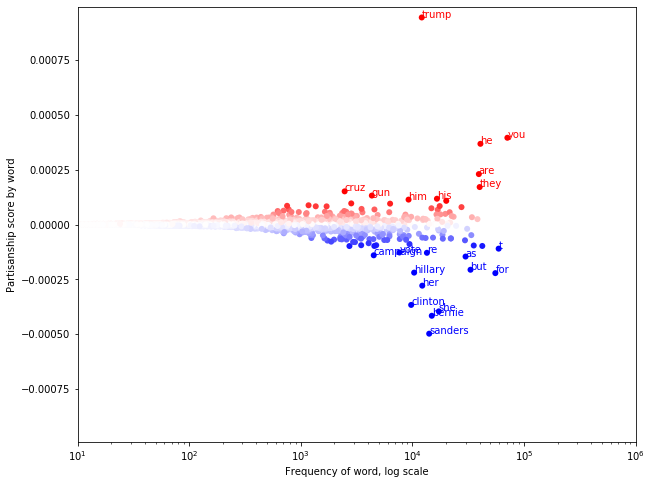

Feb - 2016


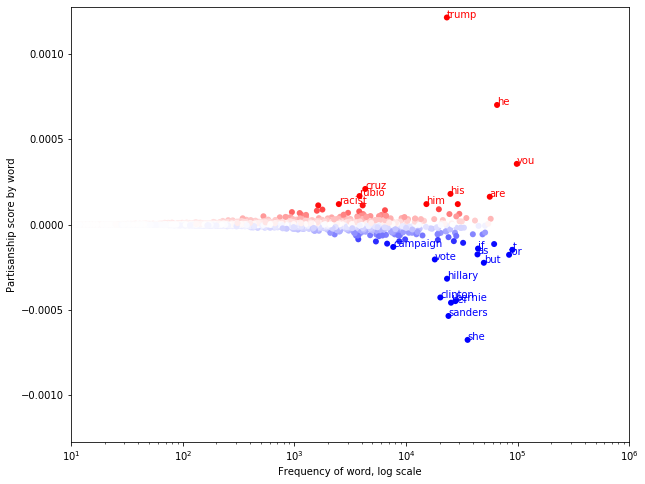

Mar - 2016


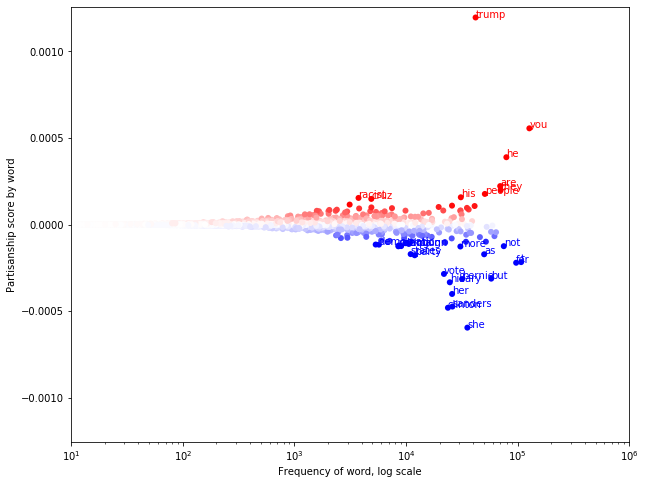

Apr - 2016


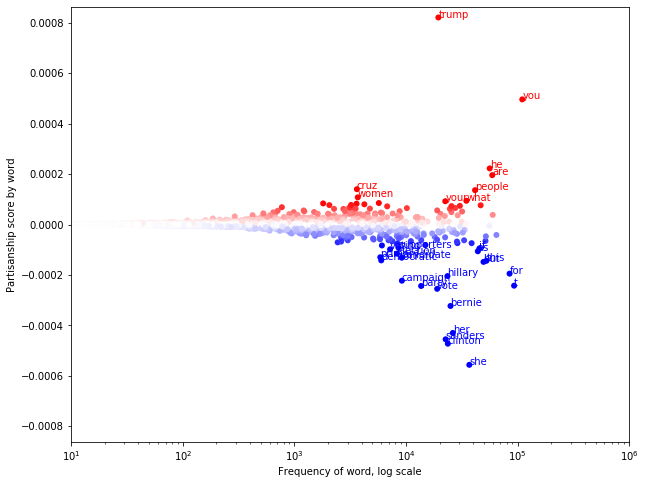

May - 2016


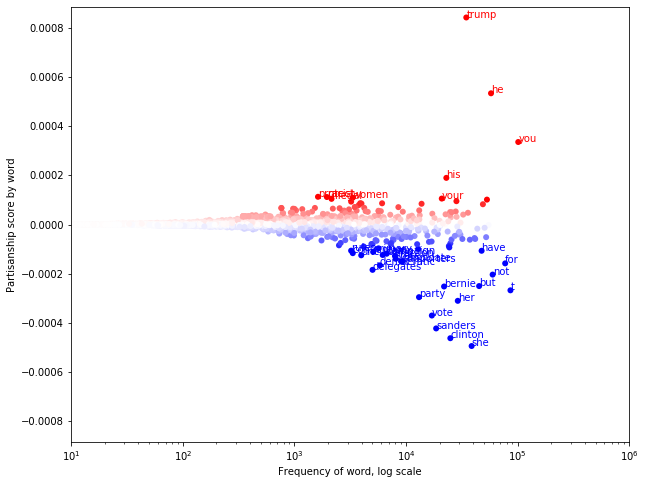

Jun - 2016


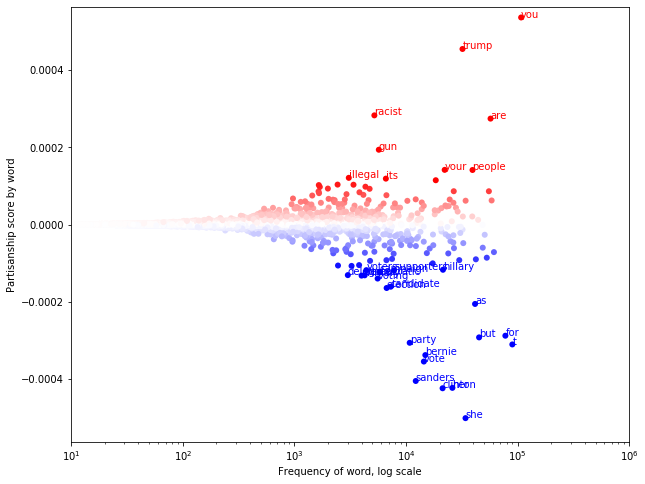

Jul - 2016


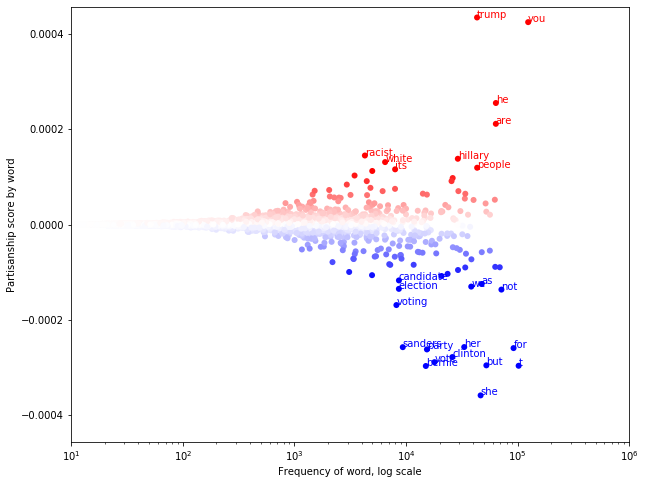

Aug - 2016


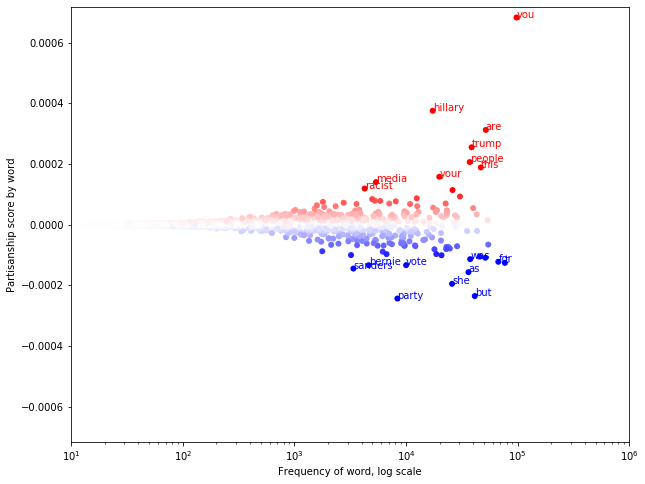

Sep - 2016


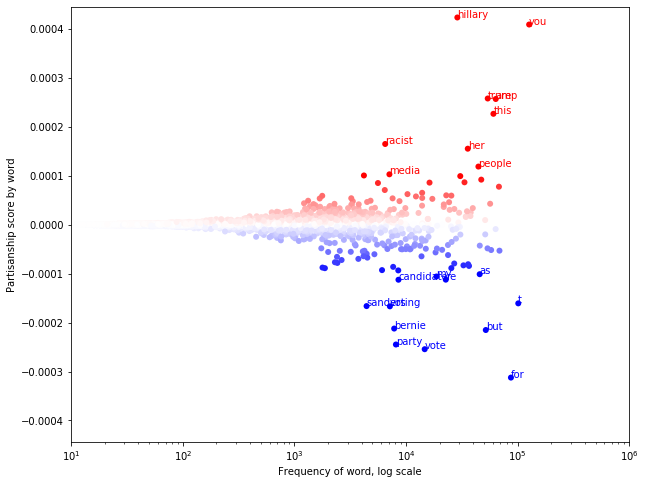

Oct - 2016


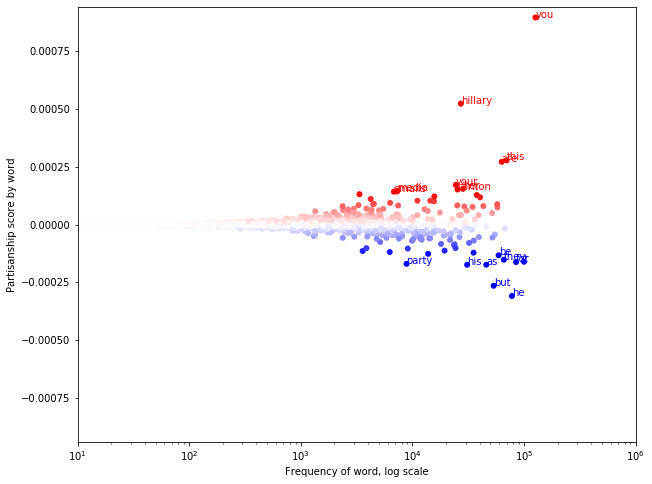

Nov - 2016


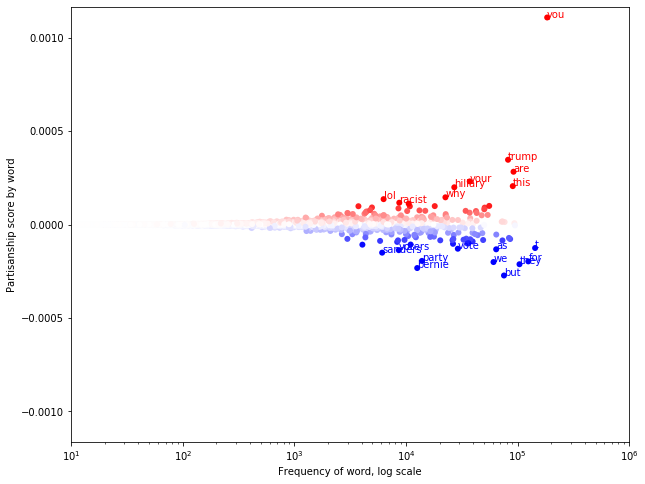

Dec - 2016


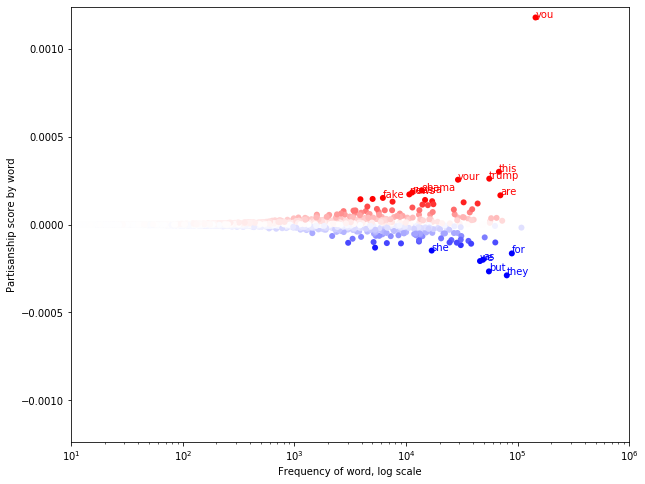

In [244]:
for i in range(24):
    print(months[i].strftime('%b - %Y'))
    tmp_sanders = sanders_tf_by_month[i].sum(axis=0).A1
    tmp_trump = trump_tf_by_month[i].sum(axis=0).A1
    
    make_plot(tmp_sanders + tmp_trump, polarization_by_month[i], sorted(polarization_by_month[i])[-10], 'Partisanship score by word')

In [205]:
months = [date(2015, i, 1) for i in range(1,13)] + [date(2016, i, 1) for i in range(1,13)]

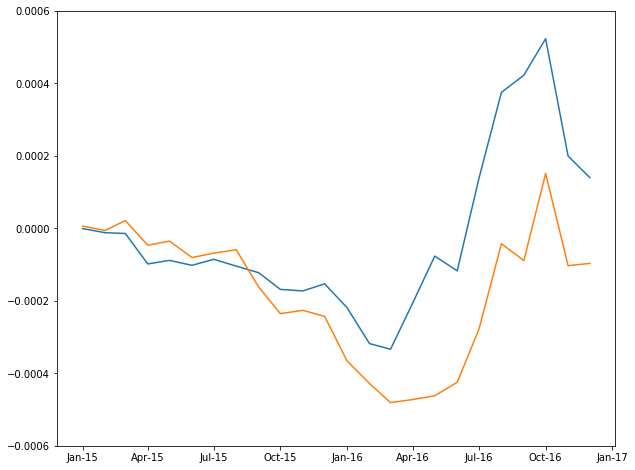

In [217]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot_date(months, [polarization_by_month[i][politics_dictionary.token2id['hillary']] for i in range(24)], linestyle = '-', marker=None)
ax.plot_date(months, [polarization_by_month[i][politics_dictionary.token2id['clinton']] for i in range(24)], linestyle = '-', marker=None)
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))
plt.ylim((-0.0006, 0.0006))
plt.show()

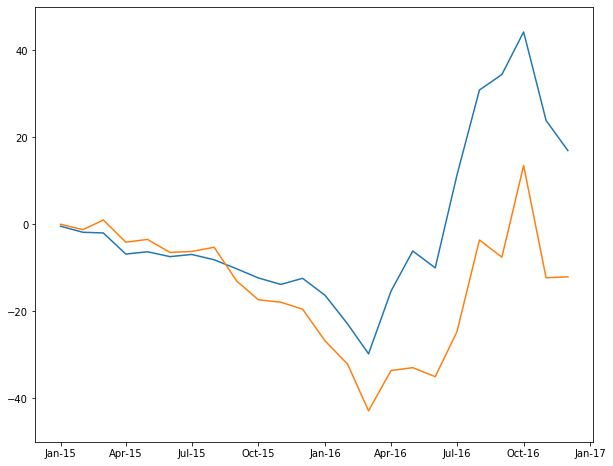

In [216]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot_date(months, [fightin_words_lists[i][politics_dictionary.token2id['hillary']] for i in range(24)], linestyle = '-', marker=None)
ax.plot_date(months, [fightin_words_lists[i][politics_dictionary.token2id['clinton']] for i in range(24)], linestyle = '-', marker=None)
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))
plt.ylim((-50, 50))
plt.show()

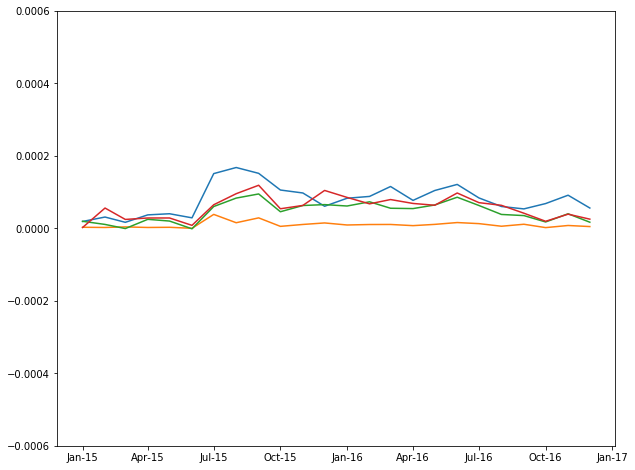

In [223]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot_date(months, [polarization_by_month[i][politics_dictionary.token2id['illegal']] for i in range(24)], linestyle = '-', marker=None)
ax.plot_date(months, [polarization_by_month[i][politics_dictionary.token2id['immigrant']] for i in range(24)], linestyle = '-', marker=None)
ax.plot_date(months, [polarization_by_month[i][politics_dictionary.token2id['immigrants']] for i in range(24)], linestyle = '-', marker=None)
ax.plot_date(months, [polarization_by_month[i][politics_dictionary.token2id['immigration']] for i in range(24)], linestyle = '-', marker=None)
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))
plt.ylim((-0.0006, 0.0006))
plt.show()

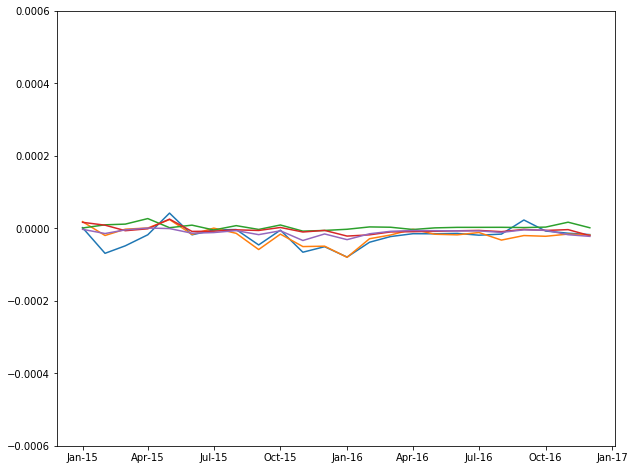

In [224]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot_date(months, [polarization_by_month[i][politics_dictionary.token2id['health']] for i in range(24)], linestyle = '-', marker=None)
ax.plot_date(months, [polarization_by_month[i][politics_dictionary.token2id['healthcare']] for i in range(24)], linestyle = '-', marker=None)
ax.plot_date(months, [polarization_by_month[i][politics_dictionary.token2id['obamacare']] for i in range(24)], linestyle = '-', marker=None)
ax.plot_date(months, [polarization_by_month[i][politics_dictionary.token2id['aca']] for i in range(24)], linestyle = '-', marker=None)
ax.plot_date(months, [polarization_by_month[i][politics_dictionary.token2id['medicare']] for i in range(24)], linestyle = '-', marker=None)
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))
plt.ylim((-0.0006, 0.0006))
plt.show()

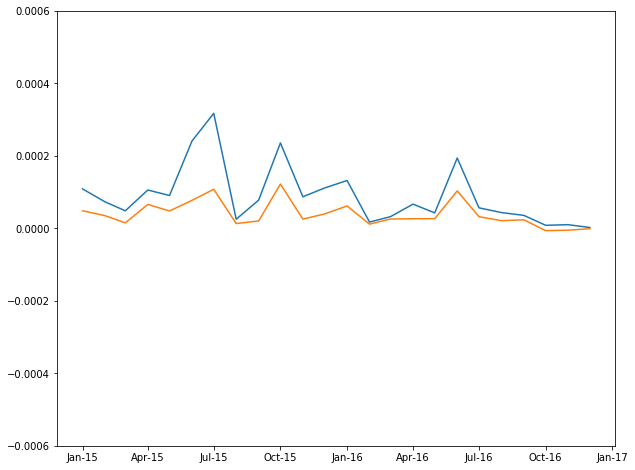

In [225]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot_date(months, [polarization_by_month[i][politics_dictionary.token2id['gun']] for i in range(24)], linestyle = '-', marker=None)
ax.plot_date(months, [polarization_by_month[i][politics_dictionary.token2id['guns']] for i in range(24)], linestyle = '-', marker=None)
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))
plt.ylim((-0.0006, 0.0006))
plt.show()

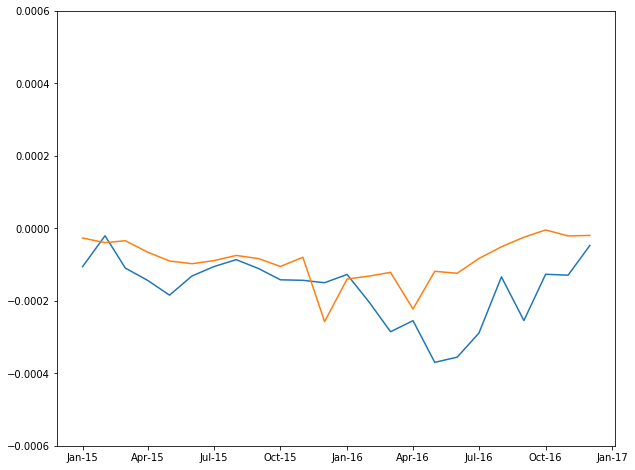

In [226]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot_date(months, [polarization_by_month[i][politics_dictionary.token2id['vote']] for i in range(24)], linestyle = '-', marker=None)
ax.plot_date(months, [polarization_by_month[i][politics_dictionary.token2id['campaign']] for i in range(24)], linestyle = '-', marker=None)
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))
plt.ylim((-0.0006, 0.0006))
plt.show()

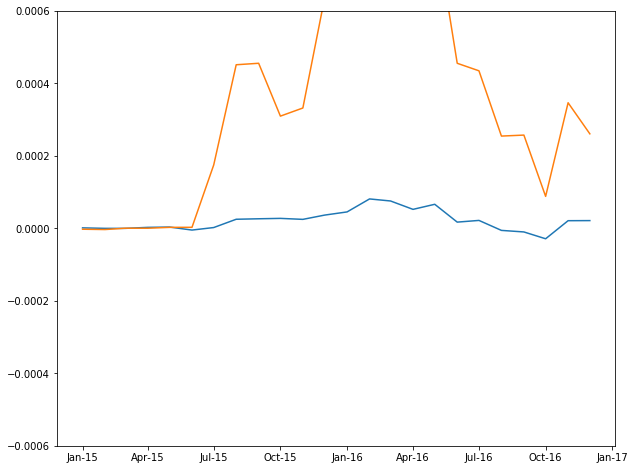

In [227]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot_date(months, [polarization_by_month[i][politics_dictionary.token2id['donald']] for i in range(24)], linestyle = '-', marker=None)
ax.plot_date(months, [polarization_by_month[i][politics_dictionary.token2id['trump']] for i in range(24)], linestyle = '-', marker=None)
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))
plt.ylim((-0.0006, 0.0006))
plt.show()

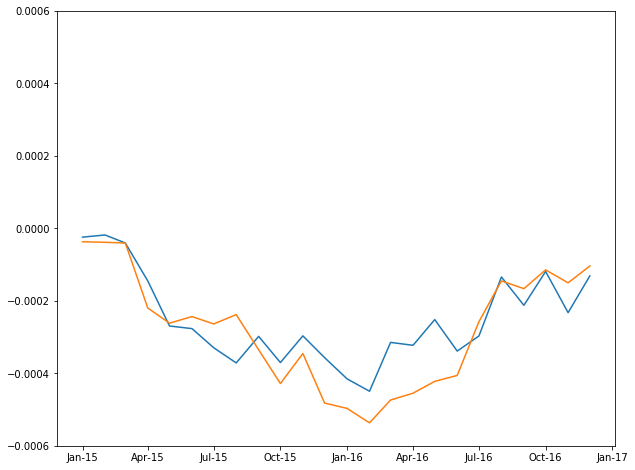

In [228]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot_date(months, [polarization_by_month[i][politics_dictionary.token2id['bernie']] for i in range(24)], linestyle = '-', marker=None)
ax.plot_date(months, [polarization_by_month[i][politics_dictionary.token2id['sanders']] for i in range(24)], linestyle = '-', marker=None)
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))
plt.ylim((-0.0006, 0.0006))
plt.show()

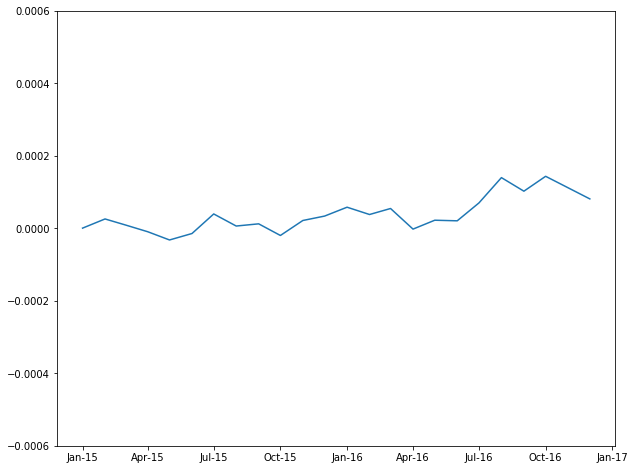

In [229]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot_date(months, [polarization_by_month[i][politics_dictionary.token2id['media']] for i in range(24)], linestyle = '-', marker=None)
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))
plt.ylim((-0.0006, 0.0006))
plt.show()

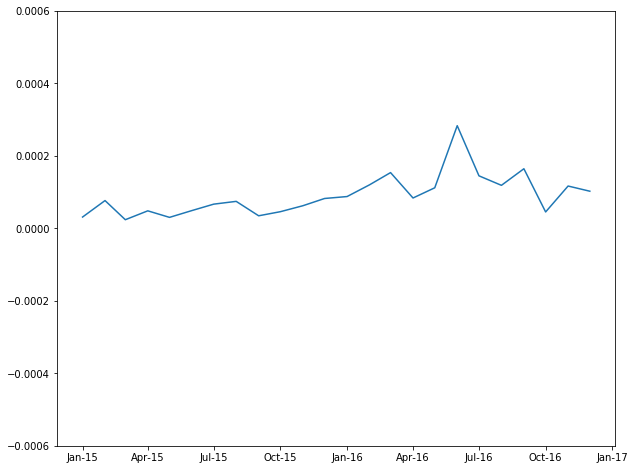

In [231]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot_date(months, [polarization_by_month[i][politics_dictionary.token2id['racist']] for i in range(24)], linestyle = '-', marker=None)
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))
plt.ylim((-0.0006, 0.0006))
plt.show()

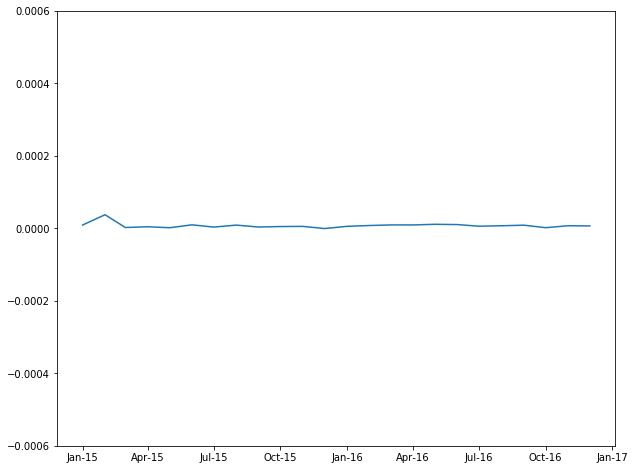

In [232]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot_date(months, [polarization_by_month[i][politics_dictionary.token2id['sjw']] for i in range(24)], linestyle = '-', marker=None)
ax.xaxis.set_major_formatter(DateFormatter('%b-%y'))
plt.ylim((-0.0006, 0.0006))
plt.show()